In [1]:
# Just to know last time this was run:
import time
print time.ctime()

Wed Jun  1 17:01:37 2016


This is part of the Python lecture given by Christophe Morisset at IA-UNAM. More informations at: http://python-astro.blogspot.mx/


# D: How to make plots, images, 3D, etc, using Matplotlib

In [2]:
# this allows the plots to appear in the Notebook webpage:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt # this is the plotting library

/Users/christophemorisset/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Very well done tutorials on the mail Matplotlib web page: http://matplotlib.org/

#### Simple plot

 In the following cell, we plot a function

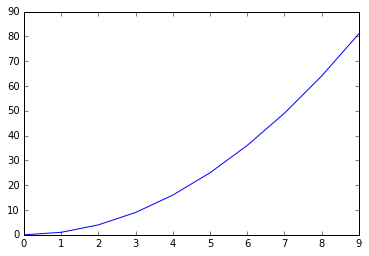

In [3]:
# Just to convince that things are easy:
x = np.arange(10) # define an array
plt.plot(x, x**2) # so quickly plotted... Notice the ";" at the end of the line -> ;

#### Controling colors and symbols

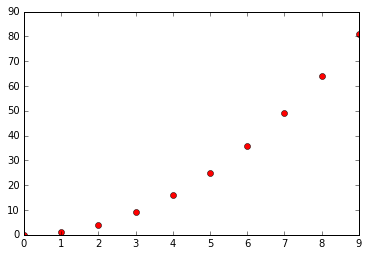

In [4]:
plt.plot(x, x**2, 'or');

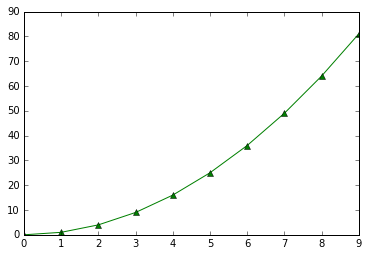

In [5]:
plt.plot(x, x**2, c='green', marker='^');

In [6]:
# To illustrate the possibilities of the interactive window:
%matplotlib tk
plt.plot(x, x**2, '*b', linestyle='-') ;

In [7]:
# Back to the inline graphics mode
%matplotlib inline

#### Overplot

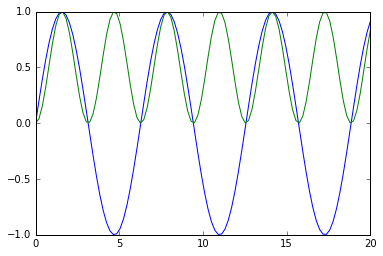

In [8]:
x = np.linspace(0, 20, 100)  # 100 evenly-spaced values from 0 to 20
y = np.sin(x)

plt.plot(x, y)
plt.plot(x, y**2) # overplot by default;

#### Fixing axes limits

(0.0, 6.283185307179586)

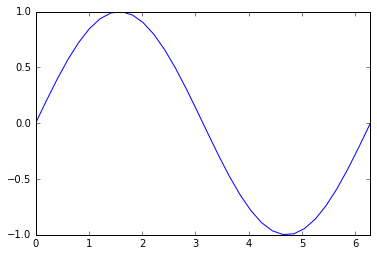

In [9]:
plt.plot(x, y)
plt.xlim(0., np.pi*2) # Take car, it's NOT plt.xlim = (1, 2), this would ERASE the xlim method from plt!!!;

#### Labels, titles

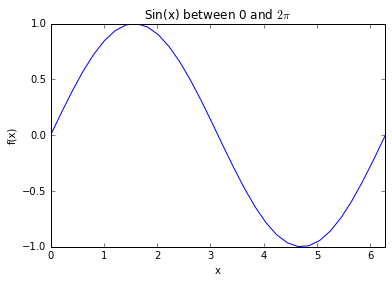

In [10]:
plt.plot(x, y)
plt.xlim((0., np.pi*2))
plt.title(r'Sin(x) between 0 and $2\pi$')
plt.xlabel('x')
plt.ylabel('f(x)');

#### plot method documentation

In [11]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    If used with labeled data, make sure that the color spec is not
    included as an element in data, as otherwise the last case
    ``plot("v","r", data={"v":..., "r":...)``
    can be interpreted as the first case which would do ``plot(v, r)``
    using the default line style and color.
    
    If not used wi

#### Legends

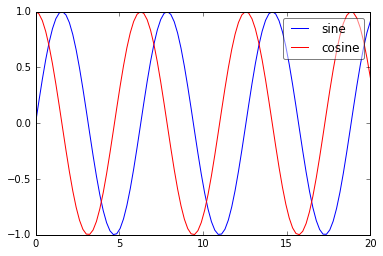

In [12]:
x = np.linspace(0, 20, 100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1, '-b', label='sine')
plt.plot(x, y2, '-r', label='cosine')
plt.legend(loc='upper right', fancybox=True, framealpha=0.5)
#plt.ylim((-1.5, 2.0));

#### Object oriented way

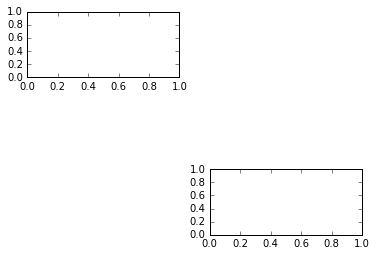

In [13]:
fig = plt.figure()  # a new figure window
ax = fig.add_subplot(3, 2, 1)  # specify (nrows, ncols, axnum)
ax2 = fig.add_subplot(3, 2, 6)  # specify (nrows, ncols, axnum)
# same as ax = fig.add_subplot()

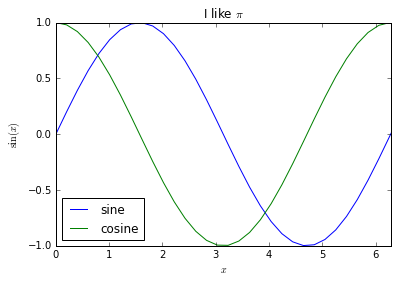

In [14]:
fig, ax = plt.subplots()  # one command way
ax.plot(x, y1)
ax.plot(x, y2)
ax.set_xlim(0., 2*np.pi)
ax.legend(['sine', 'cosine'], loc='best') # If the legends are not already defined in the plot call
ax.set_xlabel("$x$")
ax.set_ylabel("$\sin(x)$")
ax.set_title("I like $\pi$");

In [15]:
# The following outputs a HUGE quantity of information! I comment it for now
#help(ax)

#### log plots

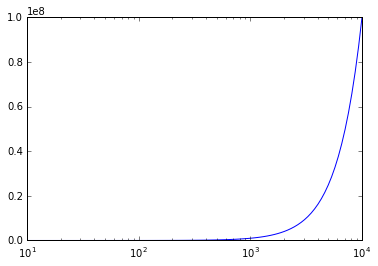

In [16]:
xl = np.logspace(1, 4, 100)
fig, ax = plt.subplots()
ax.semilogx(xl, xl**2);

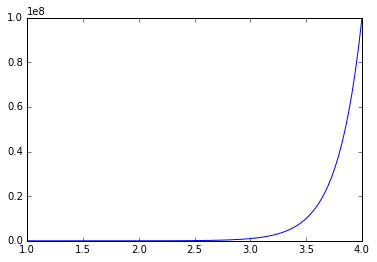

In [17]:
xl = np.logspace(1, 4, 100)
fig, ax = plt.subplots()
ax.plot(np.log10(xl), xl**2);

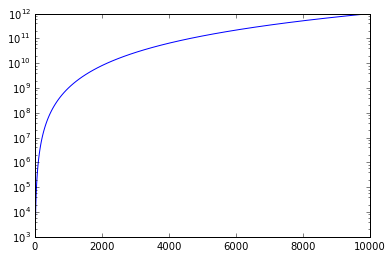

In [18]:
fig, ax = plt.subplots()
ax.semilogy(xl, xl**3);

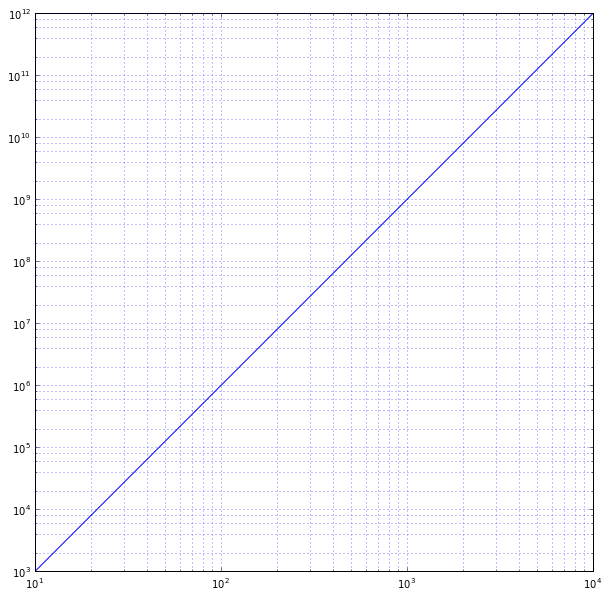

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
ax.loglog(xl, xl**3);
ax.grid(which="both",ls=":", c='blue')

#### Scatter

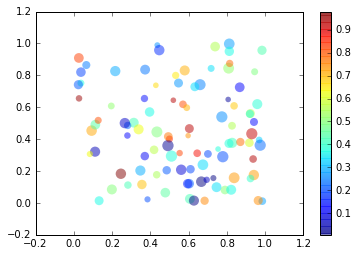

In [20]:
xr = np.random.rand(100)
yr = np.random.rand(100)
cr = np.random.rand(100)
sr = np.random.rand(100)

fig, ax = plt.subplots()
sc = ax.scatter(xr, yr, c=cr, s=30+sr*100, edgecolor='none', alpha=0.5); # Sizes and colors depend on valyues of other variables
fig.colorbar(sc);

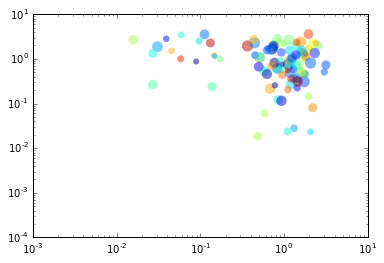

In [21]:
# log axes can be defined after the plot
xr = np.abs(1 + np.random.randn(100))
yr = np.abs(1 + np.random.randn(100))
fig, ax = plt.subplots()
sc = ax.scatter(xr, yr, c=cr, s=30+sr*100, edgecolor='none', alpha=0.5); # Sizes and colors depend on valyues of other variables
ax.set_xscale('log')
ax.set_yscale('log')

#### multiple plots

(4, 3)


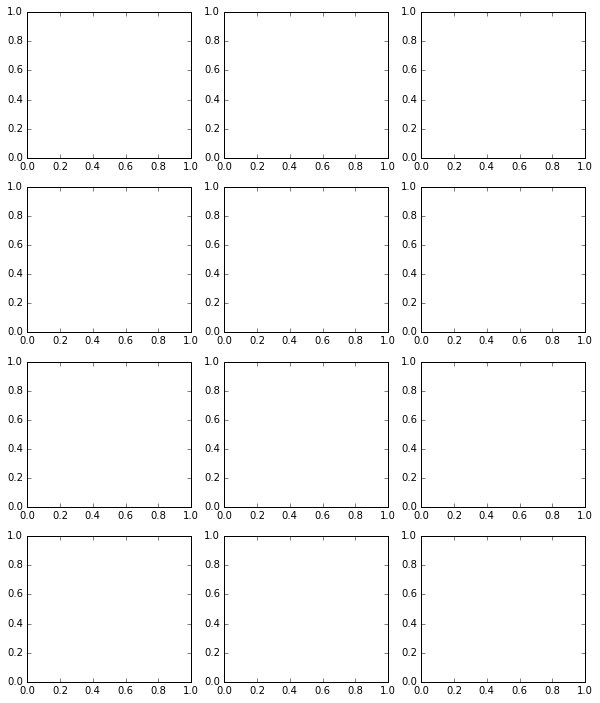

In [22]:
fig, axes = plt.subplots(4, 3, figsize=(10,12))
print axes.shape

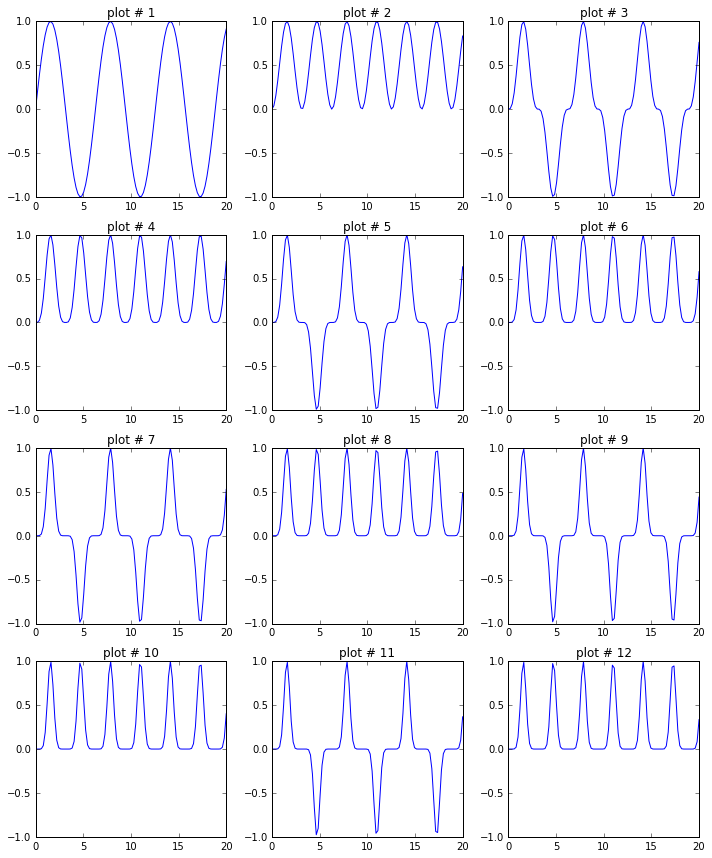

In [23]:
fig, axes = plt.subplots(4, 3, figsize=(10,12))
for i, ax in enumerate(axes.ravel()): # axes is a 2D array.. Need to ravel it to run over every ax
    ax.set_title('plot # {}'.format(i+1))
    ax.plot(x, y1**(i+1))
    ax.set_ylim((-1, 1))
fig.tight_layout() # Better output

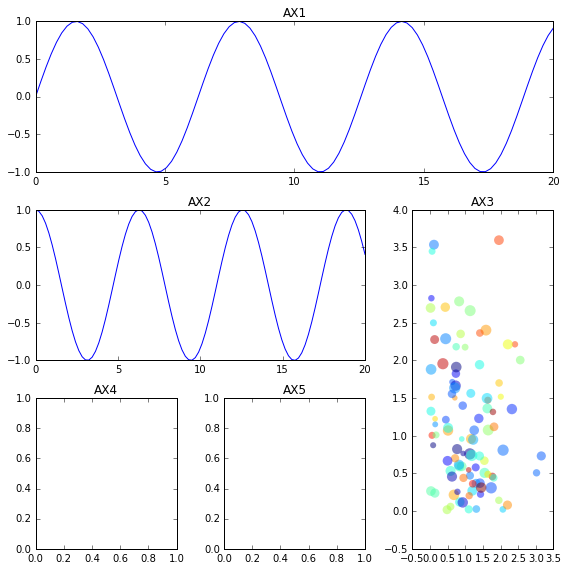

In [24]:
fig = plt.figure(figsize=(8, 8))
gs = plt.GridSpec(3, 3)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :2])
ax3 = fig.add_subplot(gs[1:, 2])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])
ax1.plot(x, y1)
ax1.set_title('AX1')
ax2.plot(x, y2)
ax2.set_title('AX2')
ax3.scatter(xr, yr, c=cr, s=30+sr*100, edgecolor='none', alpha=0.5)
ax3.set_title('AX3')
ax4.set_title('AX4')
ax5.set_title('AX5')
fig.tight_layout()
#etc...

#### Order of the commands

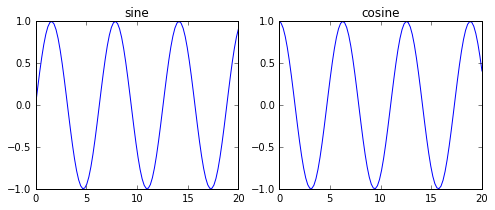

In [25]:
fig1 = plt.figure(figsize=(8, 3))
ax1 = fig1.add_subplot(1, 2, 1)
ax1.plot(x, np.sin(x))
ax1.set_title('sine')

ax2 = fig1.add_subplot(1, 2, 2)
ax2.plot(x, np.cos(x))
ax2.set_title('cosine');

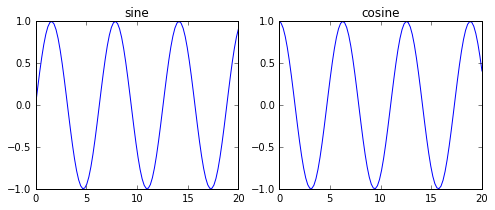

In [26]:
fig1 = plt.figure(figsize=(8, 3))
ax1 = fig1.add_subplot(1, 2, 1)
ax2 = fig1.add_subplot(1, 2, 2)

ax1.plot(x, np.sin(x))
ax2.plot(x, np.cos(x))

ax1.set_title('sine') # you can go back to change ax1 and ax2 after plotting
ax2.set_title('cosine') # They both are objects containing method to apply on them;

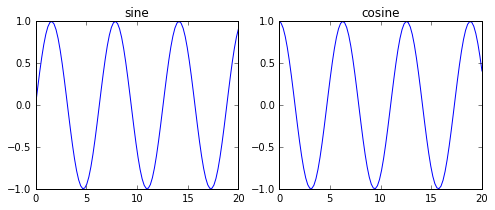

In [27]:
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

ax1.plot(x, np.sin(x))
ax2.plot(x, np.cos(x))

ax1.set_title('sine') # you can go back to change ax1 and ax2 after plotting
ax2.set_title('cosine') # They both are objects containing method to apply on them;

#### Everything is object

<type 'list'>
1


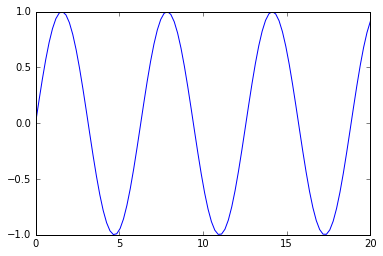

In [28]:
fig, ax = plt.subplots()
lines = ax.plot(x, np.sin(x))
print type(lines)
print(len(lines))

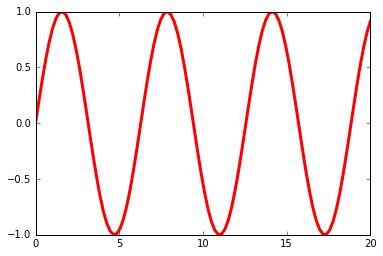

In [29]:
fig, ax = plt.subplots()
lines = ax.plot(x, np.sin(x))
line = lines[0]
#help(line) # HUGE quantity of information
line.set_color('red')
line.set_linewidth(3)
fig.canvas.draw() # this is not necessary in notebook, but in scripts it is.

[<matplotlib.lines.Line2D object at 0x11854e510>, <matplotlib.lines.Line2D object at 0x118ada090>, <matplotlib.lines.Line2D object at 0x118ada1d0>]


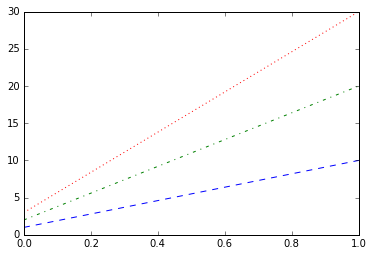

In [30]:
fig, ax = plt.subplots()
lines = ax.plot([[1,2,3],[10,20,30]])
print lines

lines[0].set_linestyle('--')
lines[1].set_linestyle('-.')
lines[2].set_linestyle(':')

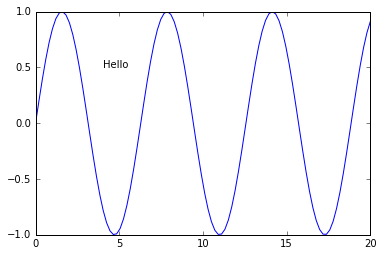

In [31]:
fig, ax = plt.subplots()
lines = ax.plot(x, np.sin(x))
ax.text(4, 0.5, "Hello");

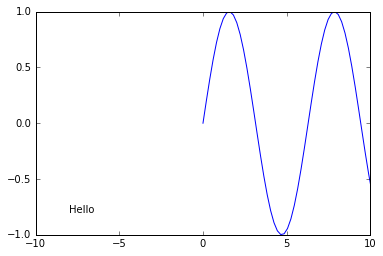

In [32]:
fig, ax = plt.subplots()
lines = ax.plot(x, np.sin(x))
ax.set_xlim(-10,10)
ax.text(0.1, 0.1, "Hello", transform=ax.transAxes);

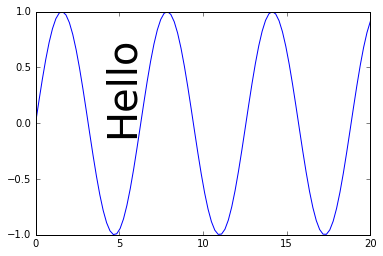

In [33]:
fig, ax = plt.subplots()
lines = ax.plot(x, np.sin(x))
txt = ax.text(4, 0.5, "Hello")
txt.set_rotation(90)
txt.set_size(40)

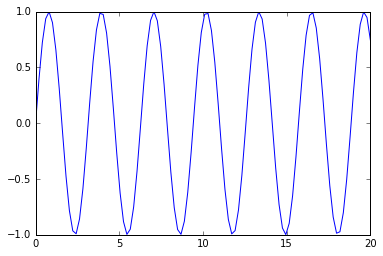

In [34]:
fig, ax = plt.subplots()
lines = ax.plot(x, np.sin(x))
lines[0].set_ydata(np.sin(2 * x)) # Change the data themselve!!!

#### Error bars

<class 'matplotlib.container.ErrorbarContainer'>


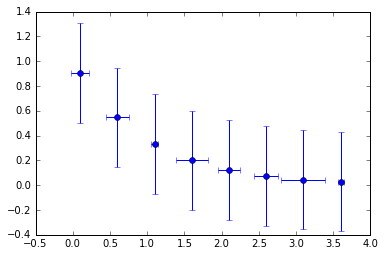

In [35]:
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)
xerr = np.random.rand(len(x))*0.3
fig, ax = plt.subplots()
eb = ax.errorbar(x, y, xerr=xerr, yerr=0.4, fmt='o')
print type(eb)

#### Sharing axes

In [36]:
%matplotlib tk
fig, axes = plt.subplots(2, sharex=True)
axes[0].plot(x, y)
axes[0].set_title('Sharing X axis')
axes[1].scatter(x, y);

In [37]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True) # Unpacking the axes
ax1.plot(x, y)
f.suptitle('Main TITLE')
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing both axes')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
# Fine-tune figure; make subplots close to each other 
fig.subplots_adjust(hspace=0)

In [39]:
%matplotlib inline

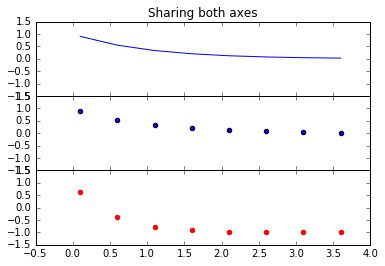

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing both axes')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
# Fine-tune figure; make subplots close to each other 
fig.subplots_adjust(hspace=0)

#### Histograms

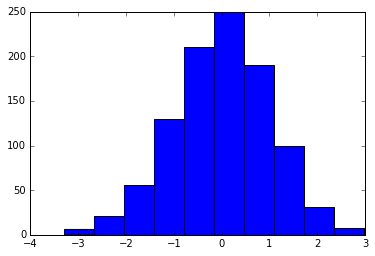

In [41]:
x = np.random.normal(size=1000)
fig, ax = plt.subplots()
H = ax.hist(x)

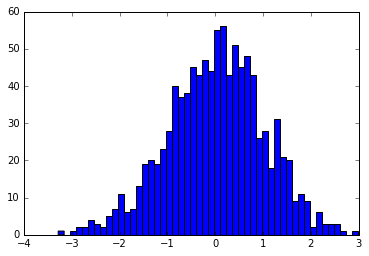

In [42]:
fig, ax = plt.subplots()
H = ax.hist(x, bins=50)

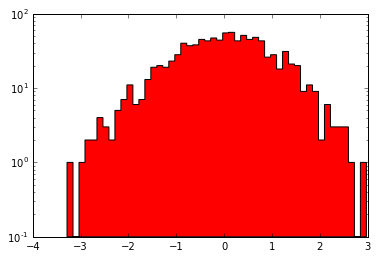

In [43]:
fig, ax = plt.subplots()
H = ax.hist(x, bins=50, histtype='stepfilled', log=True, color='r')

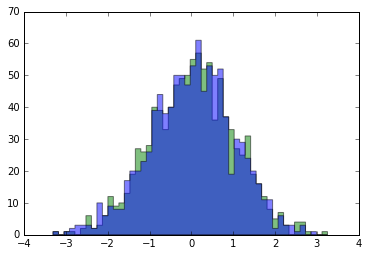

In [44]:
x2 = np.random.normal(size=1000)
fig, ax = plt.subplots()
H = ax.hist((x, x2), bins=50, alpha=0.5, histtype='stepfilled')

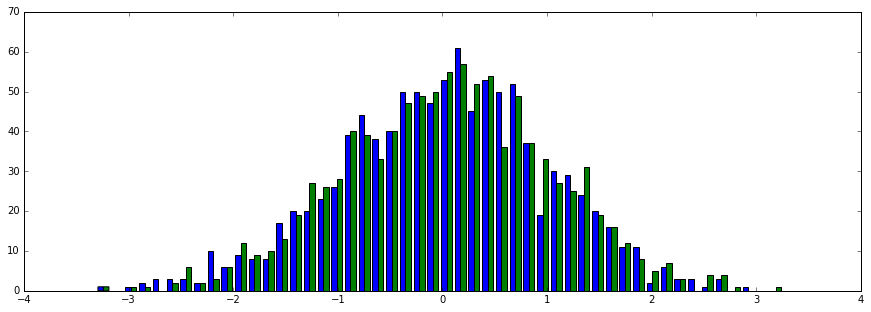

In [45]:
fig, ax = plt.subplots(figsize=(15,5))
H = ax.hist((x, x2), bins=50, histtype='bar')

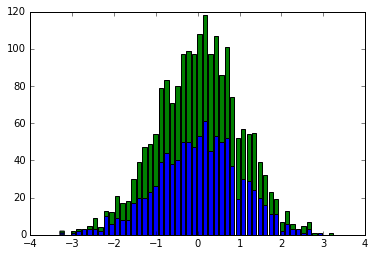

In [46]:
fig, ax = plt.subplots()
H = ax.hist((x, x2), bins=50, histtype='bar', stacked=True)

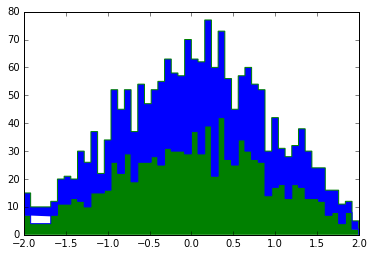

In [47]:
fig, ax = plt.subplots()
H = ax.hist((x, x2), bins=50, range=(-2, 2), histtype='step', stacked=True, fill=True)

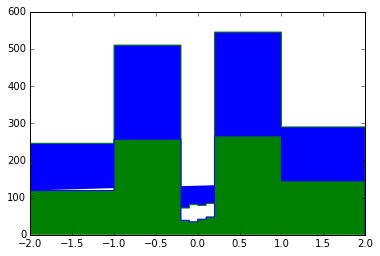

In [48]:
fig, ax = plt.subplots()
H = ax.hist((x, x2), bins=(-2, -1, -0.2, -0.1, 0., 0.1, 0.2, 1, 2), range=(-2, 2), histtype='step', stacked=True, fill=True)

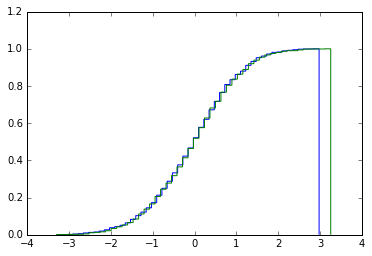

In [49]:
fig, ax = plt.subplots()
H = ax.hist(x, bins=50, histtype='step', cumulative=True, normed=True)
H2 = ax.hist(x2, bins=50, histtype='step', cumulative=True, normed=True)

#### boxplots

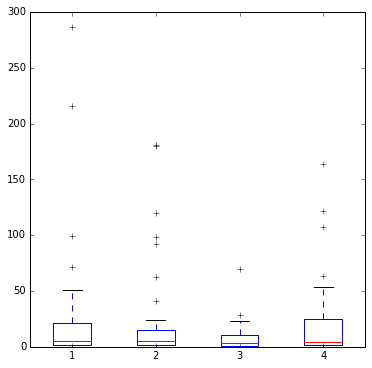

In [50]:
data = np.random.lognormal(size=(37, 4), mean=1.5, sigma=1.75)

fig, ax = plt.subplots(figsize=(6,6))
bp = ax.boxplot(data) # Nothing to see !

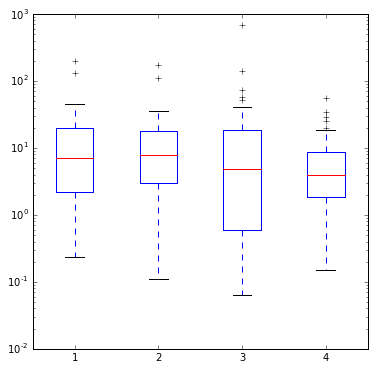

In [51]:
data = np.random.lognormal(size=(37, 4), mean=1.5, sigma=1.75)

fig, ax = plt.subplots(figsize=(6,6))
bp = ax.boxplot(data)
ax.set_yscale('log')

#### Ticks, axes and spines

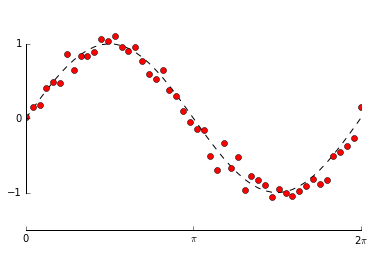

In [52]:
x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)
y2 = y + 0.1 * np.random.normal(size=x.shape) # add noise to the data

fig, ax = plt.subplots()
ax.plot(x, y, 'k--')
ax.plot(x, y2, 'ro')

# set ticks and tick labels
ax.set_xlim((0, 2*np.pi))
ax.set_xticks([0, np.pi, 2*np.pi])
ax.set_xticklabels(['0', '$\pi$','2$\pi$'])
ax.set_ylim((-1.5, 1.5))
ax.set_yticks([-1, 0, 1])

# Only draw spine between the y-ticks
ax.spines['left'].set_bounds(-1, 1)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


#### A plot inside a plot

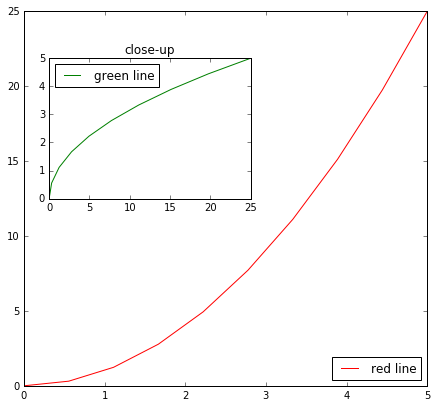

In [53]:
x = np.linspace(0, 5, 10)
y = x ** 2

fig = plt.figure(figsize=(7,6.5))

ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
ax2 = fig.add_axes([0.15, 0.5, 0.4, 0.3]) # inset axes

# main figure
ax1.plot(x, y, 'r', label='red line')
ax1.legend(loc=4)
# insert
ax2.plot(y, x, 'g', label = 'green line')
ax2.set_title('close-up')
ax2.legend(loc='best');

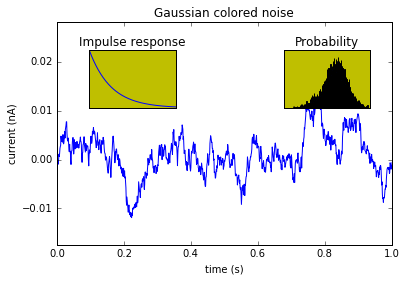

In [54]:
# The classical way

# create some data to use for the plot
dt = 0.001
t = np.arange(0.0, 10.0, dt)
r = np.exp(-t[:1000]/0.05)  # impulse response
x = np.random.randn(len(t))
s = np.convolve(x,r)[:len(x)]*dt  # colored noise

# the main axes is subplot(111) by default
plt.plot(t, s)
plt.axis([0, 1, 1.1*np.amin(s), 2*np.amax(s) ])
plt.xlabel('time (s)')
plt.ylabel('current (nA)')
plt.title('Gaussian colored noise')

# this is an inset axes over the main axes
a = plt.axes([.65, .6, .2, .2], axisbg='y')
n, bins, patches = plt.hist(s, 400, normed=1)
plt.title('Probability')
plt.setp(a, xticks=[], yticks=[])

# this is another inset axes over the main axes
b = plt.axes([0.2, 0.6, .2, .2], axisbg='y')
plt.plot(t[:len(r)], r)
plt.title('Impulse response')
plt.setp(b, xlim=(0,.2), xticks=[], yticks=[]);


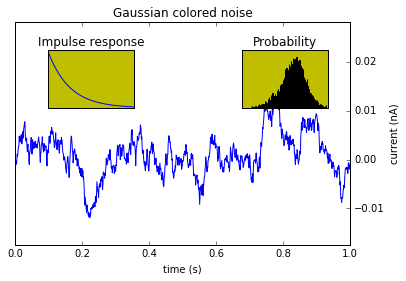

In [55]:
# The Object oriented way

# the main axes is subplot(111) by default
fig, ax = plt.subplots()
ax.plot(t, s)
ax.axis([0, 1, 1.1*np.amin(s), 2*np.amax(s) ])
# The previous command is equivalent to:
#ax.set_xlim((0., 1))
#ax.set_ylim((1.1*np.amin(s), 2*np.amax(s)))
ax.set_xlabel('time (s)')
ax.set_ylabel('current (nA)')
ax.set_title('Gaussian colored noise')
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

# this is an inset axes over the main axes
ax2 = plt.axes([.65, .6, .2, .2], axisbg='y')
n, bins, patches = ax2.hist(s, 400, normed=1)
ax2.set_title('Probability')
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])

# this is another inset axes over the main axes
ax3 = plt.axes([0.2, 0.6, .2, .2], axisbg='y')
ax3.plot(t[:len(r)], r)
ax3.set_title('Impulse response')
ax3.set_xlim((0., .2))
ax3.xaxis.set_ticks([])
ax3.yaxis.set_ticks([]);

#### Play with all the objects of a plot

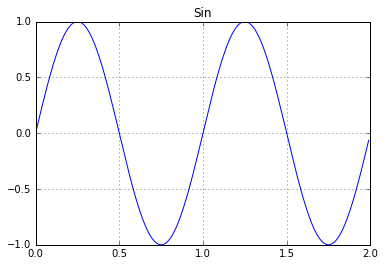

In [56]:
# Define some data
t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2*np.pi*t)
fig, ax = plt.subplots()

# Plot the data and keep the data-line into an object
datalines = ax.plot(t, s)
# Plot grids on the figure
ax.grid(True)
tit = ax.set_title('Sin')

# Put all the lines and labels into lists of objects
ticklines = ax.spines.itervalues()
gridlines = ax.get_xgridlines()
gridlines.extend( ax.get_ygridlines() )
labels = ax.get_xticklabels()
labels.extend( ax.get_yticklabels() )
labels.append(tit)

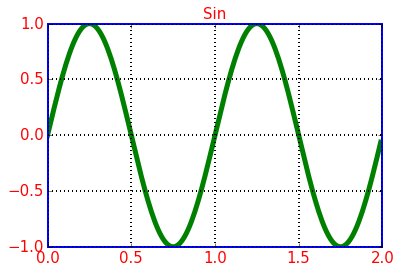

In [57]:
# Define some data
t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2*np.pi*t)
fig, ax = plt.subplots()

# Plot the data and keep the data-line into an object
datalines = ax.plot(t, s)
# Plot grids on the figure
ax.grid(True)
tit = ax.set_title('Sin')

# Put all the lines and labels into lists of objects
ticklines = ax.spines.itervalues()
gridlines = ax.get_xgridlines()
gridlines.extend( ax.get_ygridlines() )
labels = ax.get_xticklabels()
labels.extend( ax.get_yticklabels() )
labels.append(tit)# Loop on the lists of lines to change properties

for line in ticklines:
    line.set_linewidth(2)
    line.set_color('blue')

for line in datalines:
    line.set_linewidth(5)
    line.set_color('green')

for line in gridlines:
    line.set_linestyle(':')
    line.set_linewidth(2)

# loop on the labels to change properties
for label in labels:
    label.set_color('r')
    label.set_fontsize(15)

#### Changing font etc for all the plots:

In [58]:
import matplotlib
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

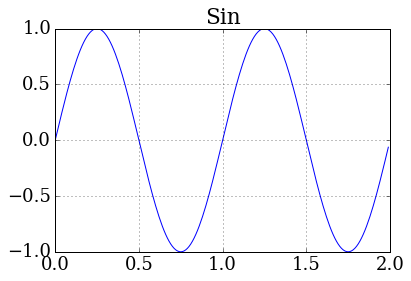

In [59]:
# Define some data
t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2*np.pi*t)
fig, ax = plt.subplots()

# Plot the data and keep the data-line into an object
datalines = ax.plot(t, s)
# Plot grids on the figure
ax.grid(True)
tit = ax.set_title('Sin')

In [60]:
# Back to default values
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans'})

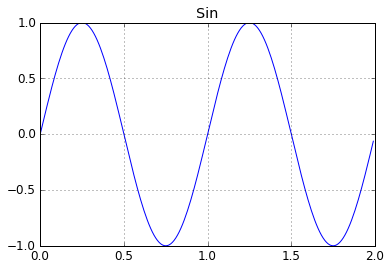

In [61]:
# Define some data
t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2*np.pi*t)
fig, ax = plt.subplots()

# Plot the data and keep the data-line into an object
datalines = ax.plot(t, s)
# Plot grids on the figure
ax.grid(True)
tit = ax.set_title('Sin')

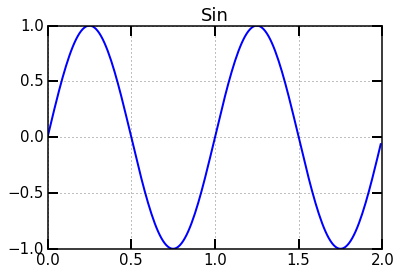

In [62]:
matplotlib.rc('axes', linewidth=1.5)
matplotlib.rc('lines', linewidth=2)
matplotlib.rc('font', size=15)
matplotlib.rc('xtick.major', width=2, size=10)
matplotlib.rc('xtick.minor', width=2, size=5)
matplotlib.rc('ytick.major', width=2, size=10)
matplotlib.rc('ytick.minor', width=2, size=5)

# Define some data
t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2*np.pi*t)
fig, ax = plt.subplots()

# Plot the data and keep the data-line into an object
datalines = ax.plot(t, s)
# Plot grids on the figure
ax.grid(True)
tit = ax.set_title('Sin')

#### Twin axes

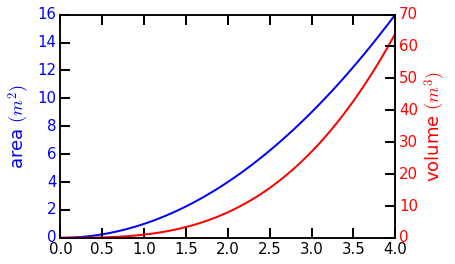

In [63]:
x = np.linspace(0, 4, 100)
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

#### Axis crossing at 0

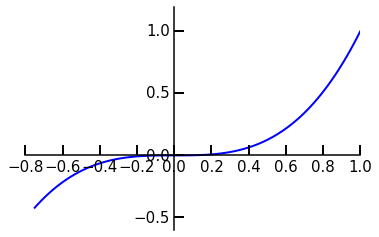

In [64]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

#### Pie plots

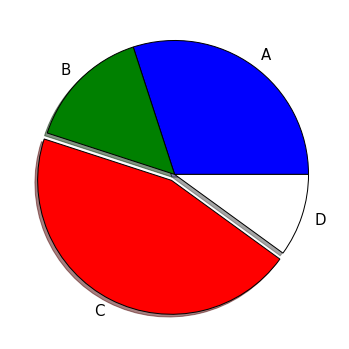

In [65]:
fracs = [30, 15, 45, 10]
colors = ['b', 'g', 'r', 'w']

fig, ax = plt.subplots(figsize=(6, 6))  # make the plot square
pie = ax.pie(fracs, colors=colors, explode=(0, 0, 0.05, 0), shadow=True,
             labels=['A', 'B', 'C', 'D'])

#### Filled regions

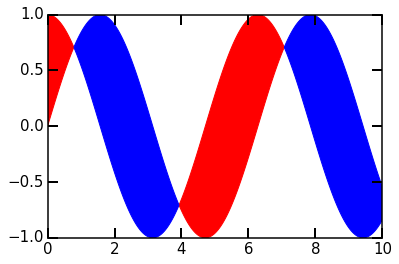

In [66]:
x = np.linspace(0, 10, 1000)
y1 = np.sin(x)
y2 = np.cos(x)

fig, ax = plt.subplots()
ax.fill_between(x, y1, y2, where=(y1 < y2), color='red')
ax.fill_between(x, y1, y2, where=(y1 > y2), color='blue');

#### 2D-histograms and hexagon plots

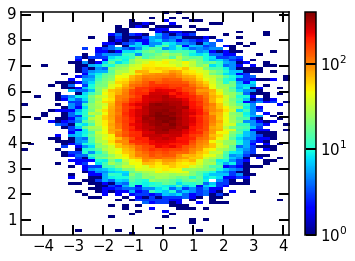

In [67]:
from matplotlib.colors import LogNorm

#normal distribution center at x=0 and y=5
x = np.random.randn(100000)
y = np.random.randn(100000)+5

fig, ax = plt.subplots()
counts, xedges, yedges, Image = ax.hist2d(x, y, bins=(40, 80), norm=LogNorm())
cb = fig.colorbar(Image)

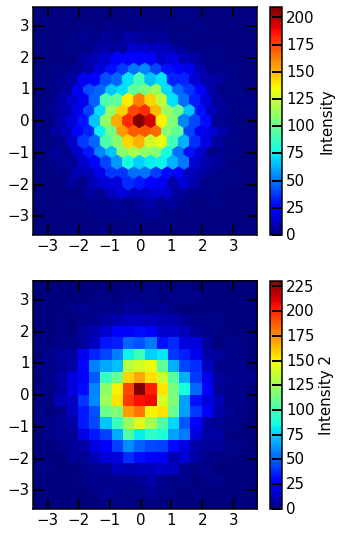

In [68]:
x, y = np.random.normal(size=(2, 10000))

fig, (ax1, ax2) = plt.subplots(2, figsize=(5, 9))

im = ax1.hexbin(x, y, gridsize=20)
cb = fig.colorbar(im, ax=ax1)
cb.set_label('Intensity')

H = ax2.hist2d(x, y, bins=20)
cb = fig.colorbar(H[3], ax=ax2)
cb.set_label('Intensity 2')

#### 2D data sets and Images

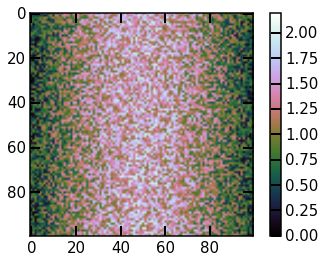

In [69]:
I = np.random.random((100, 100))
I += np.sin(np.linspace(0, np.pi, 100))
fig, ax = plt.subplots()
im = ax.imshow(I, cmap=plt.cm.cubehelix, vmin=0, vmax=2.2) # draw the image
cb = fig.colorbar(im) # put the colorbar

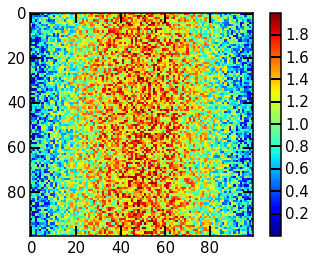

In [70]:
fig, ax = plt.subplots()
im = ax.imshow(I, cmap=plt.cm.jet, interpolation='none') # draw the image, no interpolations, raw data
cb = fig.colorbar(im, ax=ax) # put the colorbar

In [71]:
help(plt.imshow)

Help on function imshow in module matplotlib.pyplot:

imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=None, filternorm=1, filterrad=4.0, imlim=None, resample=None, url=None, hold=None, data=None, **kwargs)
    Display an image on the axes.
    
    Parameters
    -----------
    X : array_like, shape (n, m) or (n, m, 3) or (n, m, 4)
        Display the image in `X` to current axes.  `X` may be a float
        array, a uint8 array or a PIL image. If `X` is an array, it
        can have the following shapes:
    
        - MxN -- luminance (grayscale, float array only)
        - MxNx3 -- RGB (float or uint8 array)
        - MxNx4 -- RGBA (float or uint8 array)
    
        The value for each component of MxNx3 and MxNx4 float arrays
        should be in the range 0.0 to 1.0; MxN float arrays may be
        normalised.
    
    cmap : `~matplotlib.colors.Colormap`, optional, default: None
        If None, d

#### Contour

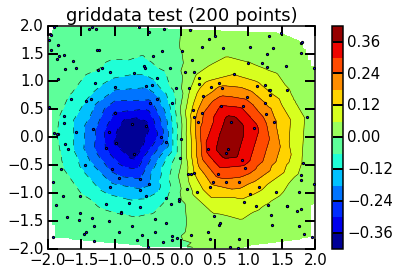

In [72]:
from matplotlib.mlab import griddata
fig, ax = plt.subplots()
# make up data.
#npts = int(raw_input('enter # of random points to plot:'))
npts = 200
x = np.random.uniform(-2, 2, npts)
y = np.random.uniform(-2, 2, npts)
z = x*np.exp(-x**2 - y**2)
# define grid.
xi = np.linspace(-2.1, 2.1, 100)
yi = np.linspace(-2.1, 2.1, 200)
# grid the data.
zi = griddata(x, y, z, xi, yi, interp='linear')
# contour the gridded data, plotting dots at the nonuniform data points.
ax.contour(xi, yi, zi, 15, linewidths=0.5, colors='k')
CF = ax.contourf(xi, yi, zi, 15, 
                  vmax=abs(zi).max(), vmin=-abs(zi).max())
cb = fig.colorbar(CF)  # draw colorbar
# plot data points.
ax.scatter(x, y, marker='o', c='b', s=5, zorder=10)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_title('griddata test (%d points)' % npts);

#### 3D scatter plots

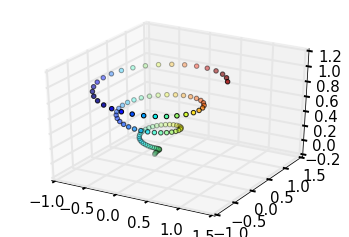

In [73]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')

z = np.linspace(0, 1, 100)
x = z * np.sin(20 * z)
y = z * np.cos(20 * z)

c = x + y

ax.scatter(x, y, z, c=c);
# ax.set_zscale('log')

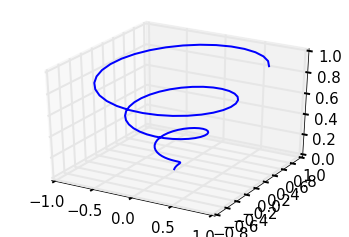

In [74]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot(x, y, z, '-b')

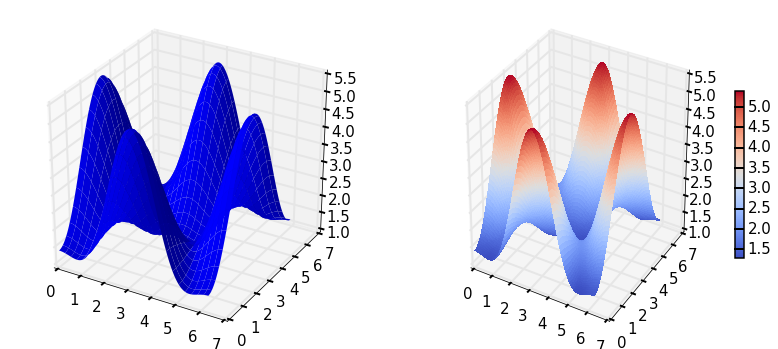

In [75]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p)*np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

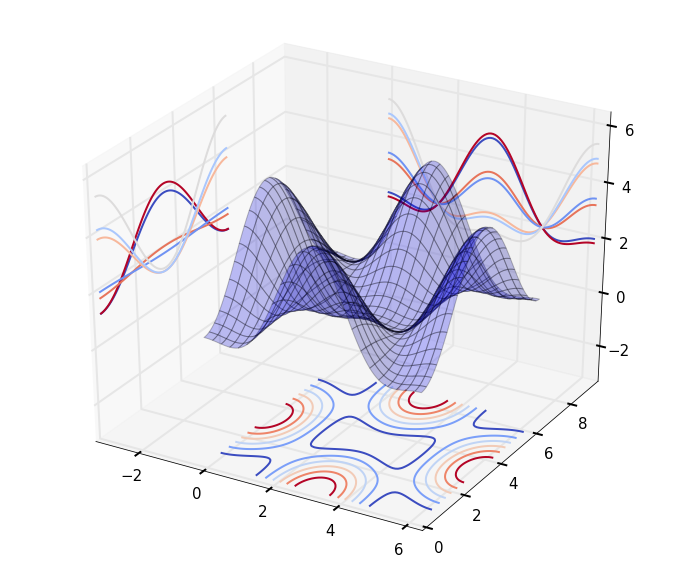

In [76]:
pi = np.pi
fig = plt.figure(figsize=(12,10))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-pi, cmap=plt.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-pi, cmap=plt.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*pi, cmap=plt.cm.coolwarm)

ax.set_xlim3d(-pi, 2*pi);
ax.set_ylim3d(0, 3*pi);
ax.set_zlim3d(-pi, 2*pi);

In [77]:
# Interactive turning the plot
%matplotlib tk
fig = plt.figure(figsize=(12,10))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-pi, cmap=plt.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-pi, cmap=plt.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*pi, cmap=plt.cm.coolwarm)

ax.set_xlim3d(-pi, 2*pi);
ax.set_ylim3d(0, 3*pi);
ax.set_zlim3d(-pi, 2*pi);

#### Saving plots

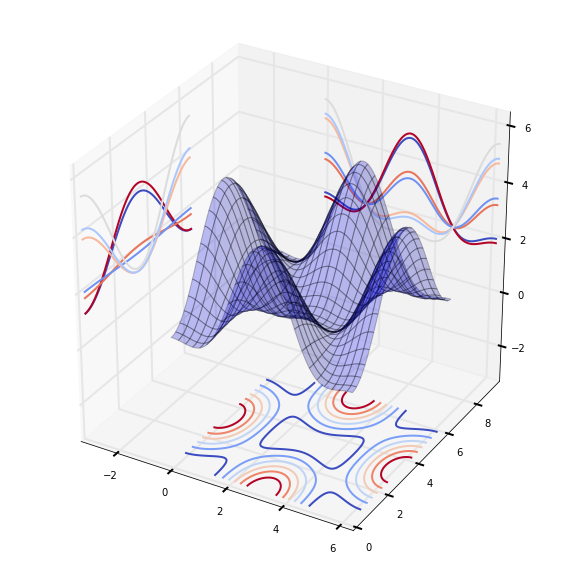

In [78]:
%matplotlib inline
fig = plt.figure()

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-pi, cmap=plt.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-pi, cmap=plt.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*pi, cmap=plt.cm.coolwarm)

ax.set_xlim3d(-pi, 2*pi);
ax.set_ylim3d(0, 3*pi);
ax.set_zlim3d(-pi, 2*pi);
fig.set_size_inches(10,10)
fig.savefig('Fig1.pdf')

In [79]:
ls *pdf

BPT1.pdf                 OOP.pdf                  intro_Python_2.pdf
Calling Fortran.pdf      Optimization.pdf         intro_Python_3.pdf
Fig1.pdf                 Useful_libraries.pdf     intro_Scipy.pdf
Interact with files.pdf  Using_PyMySQL.pdf        intro_numpy.pdf
Intro_1.pdf              intro_Matplotlib.pdf     test1.pdf
MySQL.pdf                intro_Python.pdf


Other tutorials:  http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

#### Access and clear the current figure and axe

In [80]:
fig, ax = plt.subplots()
print plt.gca() is ax # You can get the  current axes with gca
print plt.gcf() is fig # The same for the current axes. 
# But it's preferable to store them in a variable when creating
plt.clf() # clear the current figure
plt.cla() # clear the current axes
fig.clf() # clear a given figure
ax.cla() # clear a given axes

True
True


#### What's happen when not in a Notebook? plt.show() and plt.ion() commands

We are here in a Notebook, but most of the time, you will execute programs from a script or using the command line in a terminal.

When using plot, scatter or any other plotting tool, the figure will not appear when typing the command, you need to send the _plt.show()_ command to pop-up it (or them if you did more than one figure). And you will loose the interactivity with the command line! You will recover it once the figure windows are closed.

The way to change this behaviour is to call the _plt.ion()_ command (interactive On).

If you are working within an ipython session created with the --pylab option, it is done by default.
